# Sobre los datos
- El dataset correspondiente al *índice Gini* contiene paises, años y el indice que va de cero a 100. 

- El dataset correspondiente al *empleo femenino en la industria* contiene, paises, años y el crecimiento del empleo femenino en el sector industrial en porcentaje. 

In [ ]:
#Cargamos las librerias que vamos a necesitar
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr

# **Carga de datos**

In [ ]:
gini = pd.read_csv('/content/GINI_proyecto.csv')
indus_woman = pd.read_csv('/content/industria_procentaje_crecimiento_mujeres.csv')

## **GINI**

In [ ]:
gini.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN


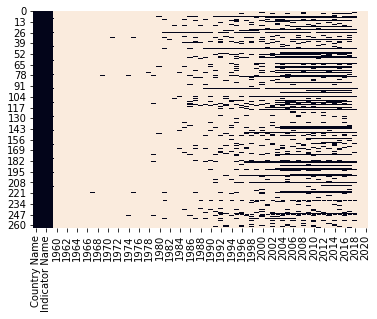

In [ ]:
sns.heatmap(gini.isnull(), cbar=False)

> Observamos que tenemos muchisimos datos faltantes para todos los países, por lo que hemos de tomar en cuenta esto a la hora de de filtrar los datos del porcentaje de crecimiento del empleo femenino en la industria para poder hacer la comparativa de tal manera que los años que usemos sean datos que efectivamente cuentan con datos tanto del **Percent woman** como de **GINI** 

In [ ]:
gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

### **Filtrado de datos GINI**

In [ ]:
def data_to_work_gini(country, Gini):
  """Get data by country
  country = str country
  Gini = DataFrame with data GINI
  """
  # In this case I'm going to work with 'México'
  pais = Gini.loc[Gini["Country Name"] == country]
  #print(pais)
  years = list(Gini.columns)
  years = years[4:]
  #print(years)
  #years.pop(0)
  #years.pop(0)
  #years.pop(0)
  #years.pop(0)
  diccionario = {'Country':[], 'Year': [], 'GINI':[]}

  for year in range(len(years)):
    diccionario["Country"].append(country)
    diccionario["Year"].append(years[year])
    value_gini = float(pais[years[year]]) 
    diccionario['GINI'].append(value_gini)


  country_gini = pd.DataFrame(diccionario)

  return (country_gini)

### Gini para México

In [ ]:
mex_gini = data_to_work_gini("México", gini)
mex_gini.head() # Comprobamos que si se hayan organizado bien

,Country,Year,GINI
0,México,1960,NaN
1,México,1961,NaN
2,México,1962,NaN
3,México,1963,NaN
4,México,1964,NaN


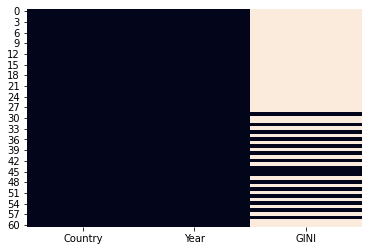

In [ ]:
sns.heatmap(mex_gini.isnull(), cbar=False)

###**Filtrado de datos PW**

**Porcentaje de empleo femenino en el sector industrial** 



In [ ]:
indus_woman.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Empleados en la industria, mujeres (% del empl...",SL.IND.EMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,"Empleados en la industria, mujeres (% del empl...",SL.IND.EMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.686,14.455,13.780,13.073,13.420,12.969,12.57,12.189,11.758,11.236,10.527,11.391,11.422,11.109,11.488,11.730,12.633,12.933,14.616,16.280001,17.239,18.934,20.058001,21.063,21.933001,22.954,24.278999,24.476,24.691,24.844999
2,Angola,AGO,"Empleados en la industria, mujeres (% del empl...",SL.IND.EMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.922,1.896,1.834,1.807,1.835,1.861,1.89,1.911,1.842,1.813,1.827,1.877,1.833,1.836,1.707,1.587,1.488,1.362,1.276,1.162000,1.115,1.144,1.155000,1.168,1.171000,1.163,1.134000,1.114,1.105,1.103000


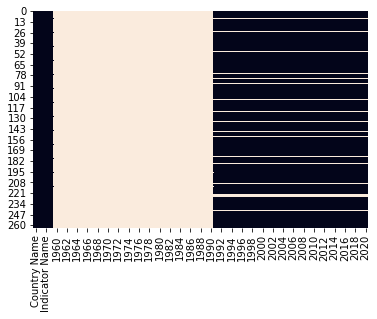

In [ ]:
sns.heatmap(indus_woman.isnull(), cbar=False)

In [ ]:
def data_to_work_pw(country, PW):
  """Get data by country
  country = str country
  PW = DataFrame with data indus_woman
  """
  # In this case I'm going to work with 'México'
  pais = PW.loc[PW["Country Name"] == country]
  #print(pais)
  years = list(PW.columns)
  years = years[4:]
  #print(years)
  #years.pop(0)
  #years.pop(0)
  #years.pop(0)
  #years.pop(0)
  diccionario = {'Country':[], 'Year': [], 'Percent Woman':[]}

  for year in range(len(years)):
    diccionario["Country"].append(country)
    diccionario["Year"].append(years[year])
    value_pw = float(pais[years[year]]) 
    diccionario['Percent Woman'].append(value_pw)


  country_pw = pd.DataFrame(diccionario)

  return (country_pw)

### PW para México

In [ ]:
mex_pw = data_to_work_pw('México', indus_woman)
mex_pw.head()

,Country,Year,Percent Woman
0,México,1960,NaN
1,México,1961,NaN
2,México,1962,NaN
3,México,1963,NaN
4,México,1964,NaN


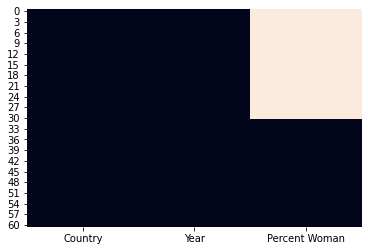

In [ ]:
sns.heatmap(mex_pw.isnull(), cbar=False)

# **Elección de datos para trabajar**

## **PW**

In [ ]:
mex_pw_work = mex_pw.loc[(mex_pw['Percent Woman'].notnull())]

In [ ]:
mex_pw_work.head()

,Country,Year,Percent Woman
31,México,1991,19.099001
32,México,1992,18.482000
33,México,1993,17.917999
34,México,1994,16.532000
35,México,1995,15.253000


## **GINI**

In [ ]:
mex_gini_work = mex_gini.loc[(mex_gini.GINI.notnull())]

In [ ]:
mex_gini_work.head()

,Country,Year,GINI
29,México,1989,54.3
32,México,1992,53.7
34,México,1994,54.3
36,México,1996,54.8
38,México,1998,53.4


# **Cruce de datos**

> Dado que vamos a determinar la relación entre GINI y PW, debemos de trabajar en los mismos años. Por lo tanto es necesario hacer un cruce en la información. 

In [ ]:
def cross_data(pw_data, gini_data):
  """Cross the data to work with the same years
  pw_data = DataFrame mex_pw_work
  gini_data = DataFrame mex_gini_work
  """
  # Almacenamos los años del pib
  years_pw = []
  for p in pw_data.Year:
    years_pw.append(p)
  # Almacenamos los años del indice gini
  years_gini = []
  for g in gini_data.Year:
    years_gini.append(g)
  # Los convertimos en conjuntos para poder hacer una intersección
  pw = set(years_pw)
  gini = set(years_gini)

  # Obtenemos los años de similitud
  years_to_work = pw.intersection(gini)
  years_to_work = list(years_to_work)
  # Seleccionamos los registros mediante similitud
  pw_to_work = pw_data.loc[pw_data.Year.isin(years_to_work)]
  gini_to_work = gini_data.loc[gini_data.Year.isin(years_to_work)]
  #print(pib_to_work)
  return (pw_to_work, gini_to_work)

In [ ]:
mex_pw_to_work, mex_gini_to_work = cross_data(mex_pw_work, mex_gini_work)

In [ ]:
mex_pw_to_work.head()

,Country,Year,Percent Woman
32,México,1992,18.482000
34,México,1994,16.532000
36,México,1996,17.858000
38,México,1998,20.355000
40,México,2000,22.124001


In [ ]:
mex_gini_to_work.head()

,Country,Year,GINI
32,México,1992,53.7
34,México,1994,54.3
36,México,1996,54.8
38,México,1998,53.4
40,México,2000,52.6


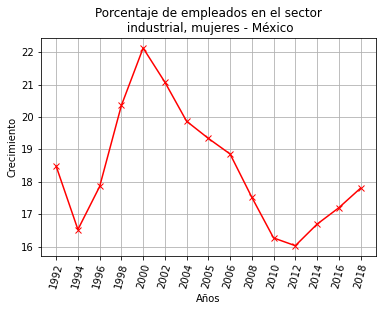

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

x_pw = mex_pw_to_work.Year
y_pw = mex_pw_to_work['Percent Woman']

fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Crecimiento')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Porcentaje de empleados en el sector\n industrial, mujeres - México')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
ax.plot(x_pw, y_pw, 'rx-')
#plt.bar(x_Pib, y_pib)

plt.xticks(rotation=75)
plt.grid()
#Finalmente mostramos la grafica con el metodo show()

#plt.show()
#cambiar titulo 
#plt.savefig('mex_pw.png', bbox_inches='tight',pad_inches = 0)

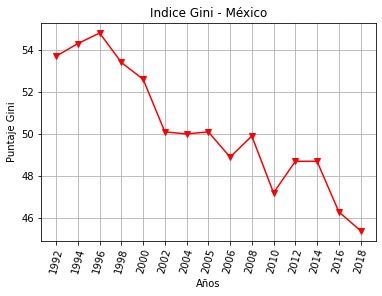

In [ ]:
x_gini = mex_gini_to_work.Year
y_gini = mex_gini_to_work.GINI
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Puntaje Gini')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Indice Gini - México')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
#plt.bar(x_gini, y_gini)
ax.plot(x_gini, y_gini, 'rv-')
plt.xticks(rotation=75)
plt.grid()
#Finalmente mostramos la grafica con el metodo show()
plt.show()
#plt.savefig('gini_mexico.png', bbox_inches='tight',pad_inches = 0)

> **Correlación entre el indice gini y el porcentaje de empleo femenino: México**

In [ ]:
r = pearsonr(y_gini, y_pw)
r[0]

0.3229954401826552

# México: Gini & PW

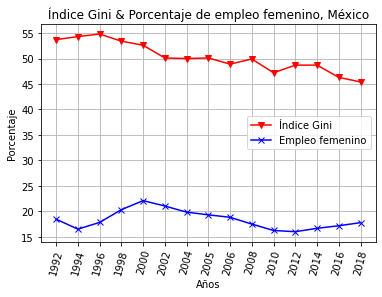

In [ ]:
x_gini = mex_gini_to_work.Year
y_gini = mex_gini_to_work.GINI
x_pw = mex_pw_to_work.Year
y_pw = mex_pw_to_work['Percent Woman']
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Índice Gini & Porcentaje de empleo femenino, México')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
#plt.bar(x_gini, y_gini)
plt.plot(x_gini, y_gini, 'rv-', label='Índice Gini')
plt.plot(x_pw, y_pw, 'bx-', label='Empleo femenino')
plt.xticks(rotation=75)
plt.grid()
#Finalmente mostramos la grafica con el metodo show()
plt.legend(loc='best')
plt.show()

#plt.savefig('gini_mexico.png', bbox_inches='tight',pad_inches = 0)

# Gini y PW para un pais de primer mundo

In [ ]:
ale_pw = data_to_work_pw('Alemania', indus_woman)
ale_gini = data_to_work_gini("Alemania", gini)

In [ ]:
ale_gini.head()

,Country,Year,GINI
0,Alemania,1960,NaN
1,Alemania,1961,NaN
2,Alemania,1962,NaN
3,Alemania,1963,NaN
4,Alemania,1964,NaN


In [ ]:
ale_pw.head()

,Country,Year,Percent Woman
0,Alemania,1960,NaN
1,Alemania,1961,NaN
2,Alemania,1962,NaN
3,Alemania,1963,NaN
4,Alemania,1964,NaN


## Elección de valores no nulos para trabajo

In [ ]:
ale_gini_work = ale_gini.loc[(ale_gini.GINI.notnull())]
ale_pw_work = ale_pw.loc[(ale_pw['Percent Woman'].notnull())]

In [ ]:
ale_gini_work.head()

,Country,Year,GINI
31,Alemania,1991,29.2
34,Alemania,1994,29.2
35,Alemania,1995,28.9
38,Alemania,1998,28.3
40,Alemania,2000,28.8


In [ ]:
ale_pw_work.head()

,Country,Year,Percent Woman
31,Alemania,1991,21.899000
32,Alemania,1992,21.493000
33,Alemania,1993,20.924000
34,Alemania,1994,20.620001
35,Alemania,1995,20.204000


In [ ]:
ale_pw_to_work, ale_gini_to_work = cross_data(ale_pw_work, ale_gini_work)

In [ ]:
ale_gini_to_work.head()

,Country,Year,GINI
31,Alemania,1991,29.2
34,Alemania,1994,29.2
35,Alemania,1995,28.9
38,Alemania,1998,28.3
40,Alemania,2000,28.8


In [ ]:
ale_pw_to_work.head()

,Country,Year,Percent Woman
31,Alemania,1991,21.899000
34,Alemania,1994,20.620001
35,Alemania,1995,20.204000
38,Alemania,1998,18.892000
40,Alemania,2000,18.274000


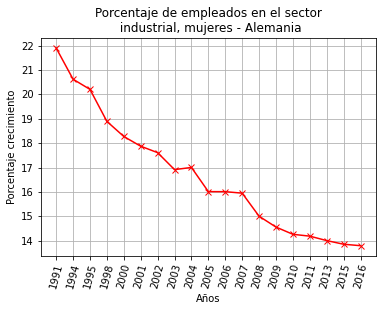

In [ ]:
ale_x_pw = ale_pw_to_work.Year
ale_y_pw = ale_pw_to_work['Percent Woman']

fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Porcentaje crecimiento')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Porcentaje de empleados en el sector\n industrial, mujeres - Alemania')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
ax.plot(ale_x_pw, ale_y_pw, 'rx-')
#plt.bar(x_Pib, y_pib)

plt.xticks(rotation=75)
plt.grid()
#Finalmente mostramos la grafica con el metodo show()
plt.show()

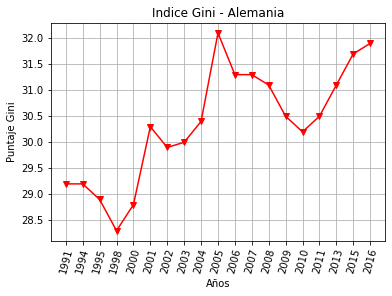

In [ ]:
ale_x_gini = ale_gini_to_work.Year
ale_y_gini = ale_gini_to_work.GINI

fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Puntaje Gini')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Indice Gini - Alemania')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
#plt.bar(x_gini, y_gini)
ax.plot(ale_x_gini, ale_y_gini, 'rv-')
plt.xticks(rotation=75)
plt.grid()
#Finalmente mostramos la grafica con el metodo show()
plt.show()

> **Correlación entre el indice gini y el porcentaje de empleo femenino: Alemania**

In [ ]:
r = pearsonr(ale_y_gini, ale_y_pw)
r[0]

-0.7665894044011308

# Alemania: Gini & PW

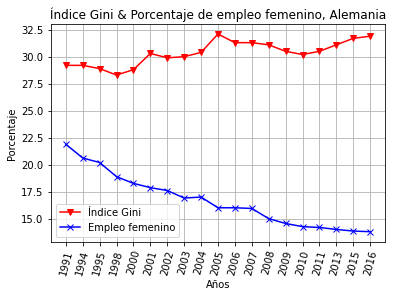

In [ ]:
x_gini = ale_gini_to_work.Year
y_gini = ale_gini_to_work.GINI
x_pw = ale_pw_to_work.Year
y_pw = ale_pw_to_work['Percent Woman']
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Índice Gini & Porcentaje de empleo femenino, Alemania')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
#plt.bar(x_gini, y_gini)
plt.plot(x_gini, y_gini, 'rv-', label='Índice Gini')
plt.plot(x_pw, y_pw, 'bx-', label='Empleo femenino')
plt.xticks(rotation=75)
plt.grid()
#Finalmente mostramos la grafica con el metodo show()
plt.legend(loc='best')
plt.show()

# Comparativa GINI: México vs Alemania

> Para lograr una buena grááfica necesito un procesamiento cruzado, trabajar con los mismos datos

In [ ]:
# Tomamos ambos los años para evaluar en cuales coinciden
mex_years_gini_tmp = list(x_gini)
ale_years_gini_tmp = list(ale_x_gini)
# Debido que Alemania cuenta con menos años, buscaremos que México
# coincida con Alemania

In [ ]:
same_year = []
for year in ale_years_gini_tmp:
  for i in mex_years_gini_tmp:
    if year == i:
      same_year.append(year)

print(same_year)


['1994', '1998', '2000', '2002', '2004', '2005', '2006', '2008', '2010', '2016']


In [ ]:
mex_gini_to_cross = []
ale_gini_to_cross = []
for i in range(len(same_year)):
  try:
    me_gin = float(mex_gini_to_work.loc[mex_gini_to_work.Year == same_year[i], 'GINI'])
    mex_gini_to_cross.append(me_gin)
  except:
    pass

  try:
    al_gin = float(ale_gini_to_work.loc[ale_gini_to_work.Year == same_year[i], 'GINI'])
    ale_gini_to_cross.append(al_gin)
  except:
    pass

10 10


> **Una vez tenemos los datos cruzados, procedemos a graficar para el indice Gini**

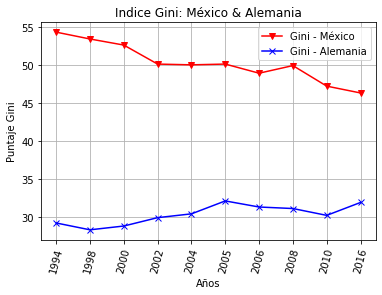

In [ ]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Puntaje Gini')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Indice Gini: México & Alemania')
#plt.bar(x_gini, y_gini)
plt.plot(same_year, mex_gini_to_cross, 'rv-', same_year, ale_gini_to_cross, 'bx-')
#ax.plot(x_gini, y_gini, 'rv-', x_pib, y_pib, 'bx-')
plt.xticks(rotation=75)
plt.grid()
plt.legend(['Gini - México', 'Gini - Alemania'], loc=1)
#Finalmente mostramos la grafica con el metodo show()
plt.show()

# Comparativa PW: México vs Alemania

In [ ]:
mex_pw_to_cross = []
ale_pw_to_cross = []
for i in range(len(same_year)):
  try:
    me_pw = float(mex_pw_to_work.loc[mex_pw_to_work.Year == same_year[i], 'Percent Woman'])
    mex_pw_to_cross.append(me_pw)
  except:
    pass

  try:
    al_pw = float(ale_pw_to_work.loc[ale_pw_to_work.Year == same_year[i], 'Percent Woman'])
    ale_pw_to_cross.append(al_pw)
  except:
    pass

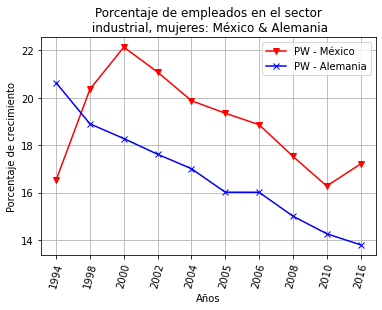

In [ ]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Porcentaje de crecimiento')
ax.set_xlabel('Años')
#Colocamos una etiqueta en el eje X
ax.set_title('Porcentaje de empleados en el sector\n industrial, mujeres: México & Alemania')
#plt.bar(x_gini, y_gini)
plt.plot(same_year, mex_pw_to_cross, 'rv-', same_year, ale_pw_to_cross, 'bx-')
#ax.plot(x_gini, y_gini, 'rv-', x_pib, y_pib, 'bx-')
plt.xticks(rotation=75)
plt.grid()
plt.legend(['PW - México', 'PW - Alemania'], loc=1)
#Finalmente mostramos la grafica con el metodo show()
plt.show()